# Benson Graphing
This notebook will import pickled Pandas dataframes that contain traffic data from 2018. Eventually it will export these graphs as high quality images for our presentation. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

%matplotlib inline

In [2]:
# Read in edited dataframes representing MTA Traffic
# for 3 months before the gala. Create dataset spanning
# from 2016 to 2018

df_2018 = pd.read_pickle('TrafficManhattanDF2018')
df_2017 = pd.read_pickle('TrafficManhattanDF2017')
df_2016 = pd.read_pickle('TrafficManhattanDF2016')

df_traffic = pd.concat([df_2016, df_2017, df_2018])    


#TrafficManhattanDF.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).sum().sort_values(['DAILY_TRAFFIC'], ascending=False

In [3]:
df_traffic.head()

,C/A,UNIT,SCP,STATION,DATE,TRAFFIC,PREV_TRAFFIC,DAILY_TRAFFIC,EDITED_STATION,Manhattan
0,A002,R051,02-00-00,59 ST,03/21/2016,7481061.0,7479828.0,1233.0,59ST,Y
1,A002,R051,02-00-00,59 ST,03/22/2016,7481954.0,7481061.0,893.0,59ST,Y
2,A002,R051,02-00-00,59 ST,03/23/2016,7484003.0,7481954.0,2049.0,59ST,Y
3,A002,R051,02-00-00,59 ST,03/24/2016,7485778.0,7484003.0,1775.0,59ST,Y
4,A002,R051,02-00-00,59 ST,03/25/2016,7487324.0,7485778.0,1546.0,59ST,Y


In [4]:
station_daily = df_traffic.groupby(['DATE', 'STATION']).sum()\
.sort_values(['DATE','DAILY_TRAFFIC'], ascending = [False,False])\
.reset_index()
station_daily.head()

,DATE,STATION,TRAFFIC,PREV_TRAFFIC,DAILY_TRAFFIC
0,06/24/2016,34 ST-HERALD SQ,6.517988e+09,6.517749e+09,243760.0
1,06/24/2016,23 ST,1.257192e+10,1.257171e+10,223683.0
2,06/24/2016,14 ST-UNION SQ,1.932043e+09,1.931834e+09,209103.0
3,06/24/2016,TIMES SQ-42 ST,1.023456e+10,1.023436e+10,203530.0
4,06/24/2016,86 ST,4.842519e+09,4.842319e+09,200562.0


In [5]:
#Get the average traffic per station over all days
avg_daily = station_daily.groupby(['STATION']).mean().sort_values(['DAILY_TRAFFIC'], ascending = False)
avg_daily.head(15)

,TRAFFIC,PREV_TRAFFIC,DAILY_TRAFFIC
STATION,,,
34 ST-HERALD SQ,9.799707e+09,9.788193e+09,199689.649306
14 ST-UNION SQ,1.482202e+09,1.481652e+09,178076.517361
23 ST,1.331404e+10,1.330870e+10,177760.013889
TIMES SQ-42 ST,1.031115e+10,1.031072e+10,170723.506944
86 ST,4.835013e+09,4.834687e+09,151367.197917
FULTON ST,8.436369e+09,8.435932e+09,140419.500000
125 ST,9.516174e+09,9.510724e+09,125835.972222
59 ST,4.726407e+09,4.716548e+09,116903.500000
CANAL ST,1.073251e+10,1.071230e+10,115559.732639


In [6]:
# Calculate average total daily ridership (entries+exits)
print(avg_daily['DAILY_TRAFFIC'].sum())

# Determine dataframe row labels
avg_daily.index

3428412.6791763455


Index(['34 ST-HERALD SQ', '14 ST-UNION SQ', '23 ST', 'TIMES SQ-42 ST', '86 ST',
       'FULTON ST', '125 ST', '59 ST', 'CANAL ST', '96 ST', '14 ST',
       'CHAMBERS ST', '28 ST', '50 ST', '72 ST', 'WALL ST', '42 ST-BRYANT PK',
       '7 AV', '145 ST', '8 AV', '77 ST', 'BOWLING GREEN', '116 ST',
       'GRAND ST', '57 ST-7 AV', '103 ST', '33 ST', '49 ST', '1 AV',
       '5 AV/53 ST', '168 ST', '181 ST', '51 ST', 'SPRING ST', '2 AV',
       'ASTOR PL', '79 ST', 'PRINCE ST', '8 ST-NYU', 'CORTLANDT ST', '135 ST',
       '5 AV/59 ST', 'CATHEDRAL PKWY', 'SOUTH FERRY', '57 ST', 'RECTOR ST',
       'HOUSTON ST', '110 ST', 'BLEECKER ST', 'EAST BROADWAY', '175 ST',
       'DYCKMAN ST', '157 ST', '191 ST', '3 AV', 'INWOOD-207 ST', '18 ST',
       '155 ST', 'CITY HALL', '207 ST', 'BROAD ST', '6 AV', 'FRANKLIN ST',
       'BOWERY', '190 ST', '215 ST'],
      dtype='object', name='STATION')

In [7]:
#station_daily.loc[station_daily.STATION == 'TIMES SQ-42 ST']
# Note: Grand central station stop is not appearing in the list. Either it is listed under another name here,
# or was not marked as in Manhattan during data cleaning.

ts_station_names = sorted(station_daily['STATION'].unique())

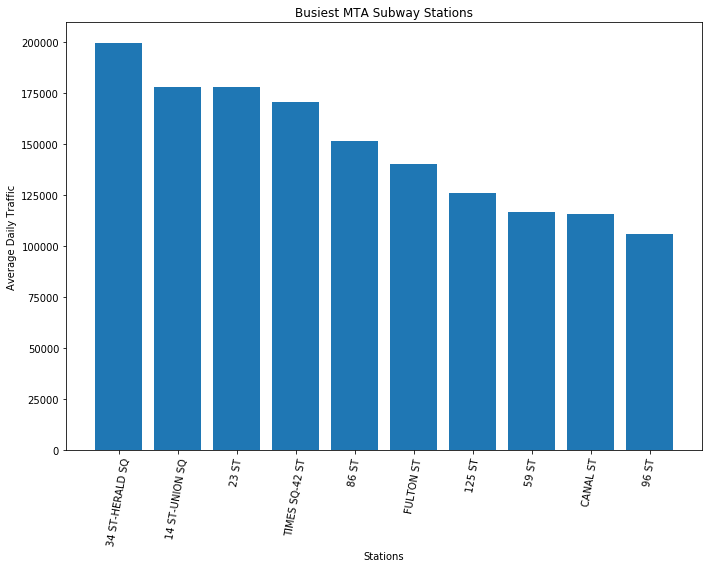

In [8]:
fig = plt.figure(figsize = [10,8])
n = 10
plt.bar(avg_daily.index[:n],avg_daily['DAILY_TRAFFIC'][:n]);
plt.xticks(rotation=80);
plt.ylabel('Average Daily Traffic')
plt.xlabel('Stations')
plt.title('Busiest MTA Subway Stations')
plt.tight_layout()

# Export figure as SVG
fig.savefig('./stations_all.svg')

# Adding in stations further filtered by location

At this point we can rank stations in Manhattan by our ridership statistic, traffic. We will now read in a list of stations that are within the Silicon Alley.

In [9]:
with open("longer_list.pkl", 'rb') as picklefile: 
    silicon_stations = pkl.load(picklefile)

In [10]:
station_names = pd.Series(sorted([station.upper() for station in silicon_stations['Station_Name'].unique()]))

We have noticed that certain string edits can be used to force matches between the two lists of stations. For example, removing 'th' from stations with numbers will result in a match.

In [11]:
station_names = station_names.str.replace('TH ', ' ')
station_names = station_names.str.replace('1ST ', '1 ')
station_names = station_names.str.replace('2ND ', '2 ')
station_names = station_names.str.replace('3RD ', '3 ')
station_names = station_names.str.replace('SQUARE', 'SQ')
station_names = station_names.str.replace('PLACE', 'PL')

In [12]:
# Comparing strings

# for s1, s2 in zip(station_names,ts_station_names):
#     print(s1, ' ----  ', s2)
temp = list(station_names)
for station in ts_station_names:
    if station not in temp:
        print(station)

103 ST
110 ST
116 ST
125 ST
135 ST
145 ST
155 ST
157 ST
168 ST
175 ST
181 ST
190 ST
191 ST
207 ST
215 ST
34 ST-HERALD SQ
42 ST-BRYANT PK
5 AV/53 ST
5 AV/59 ST
57 ST-7 AV
72 ST
77 ST
79 ST
8 ST-NYU
86 ST
96 ST
BOWLING GREEN
CATHEDRAL PKWY
DYCKMAN ST
INWOOD-207 ST
RECTOR ST
SOUTH FERRY


We can determine that certain stations from the turnstile data do not belong based on their geography. Those are as follows:  
Too far north:
* Cathedral Pkwy
* Dyckman St
* Inwood-207 St
* Generally, any street more north than 63rd ST

Too far south:
* Rector st
* South Ferry
* Bowling Green

Should be included:
* 34 ST - Herald Sq
* 42 ST - Bryant PK

Dubious:
* 5 AV/53 ST (might be too north)
* 5 AV/59 ST (might be too north)
* 8 ST-NYU (probably too far east)
* 57 ST/7 AV (might be too north)



In [13]:
# Replace the text in the ts_station_names for the stations above that should have a match
# 34 ST-HERALD SQ, and 42 ST-BRYANT PK


In [14]:
station_names

0                            14 ST
1                   14 ST-UNION SQ
2                            18 ST
3                             1 AV
4                            23 ST
5                            28 ST
6                             2 AV
7                            33 ST
8                            34 ST
9                             3 AV
10                           42 ST
11    47-50 STS ROCKEFELLER CENTER
12                           49 ST
13                           50 ST
14                           51 ST
15                           57 ST
16                           59 ST
17                            5 AV
18                      5 AV-53 ST
19                            6 AV
20                            7 AV
21                            8 AV
22                            8 ST
23                        ASTOR PL
24                     BLEECKER ST
25                          BOWERY
26                        BROAD ST
27           BROADWAY-LAFAYETTE ST
28                 B

The following graph highlights in red the high-volume stations from the turnstile data that are also in the high tech area.

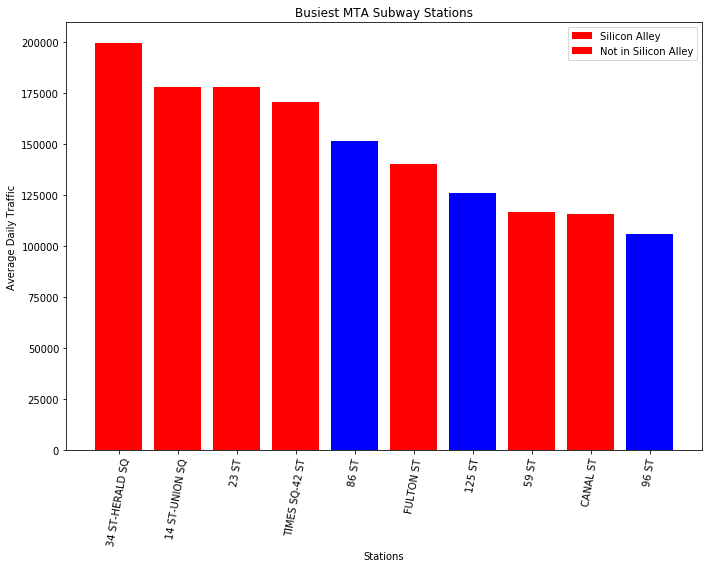

In [122]:
fig = plt.figure(figsize = [10,8])

n = 10
for idx in range(n):
    if avg_daily.index[idx] in list(station_names):
        shade = 'r'
    elif avg_daily.index[idx] == '34 ST-HERALD SQ':
        shade = 'r'
    else:
        shade = 'b'
    plt.bar(avg_daily.index[idx],avg_daily['DAILY_TRAFFIC'][idx], color=shade, label= label)
plt.xticks(rotation=80);
plt.ylabel('Average Daily Traffic')
plt.xlabel('Stations')
plt.title('Busiest MTA Subway Stations')
plt.tight_layout()

# Export figure as SVG
fig.savefig('./stations_filtered.svg')

In [108]:
# Create list of high traffic stations from the turnstile data that are in the high tech area
keepers = []
for station in avg_daily.index:
    if station in list(station_names):
        keepers.append(station)
        
print(keepers)

['14 ST-UNION SQ', '23 ST', 'TIMES SQ-42 ST', 'FULTON ST', '59 ST', 'CANAL ST', '14 ST', 'CHAMBERS ST', '28 ST', '50 ST', 'WALL ST', '7 AV', '8 AV', 'GRAND ST', '33 ST', '49 ST', '1 AV', '51 ST', 'SPRING ST', '2 AV', 'ASTOR PL', 'PRINCE ST', 'CORTLANDT ST', '57 ST', 'HOUSTON ST', 'BLEECKER ST', 'EAST BROADWAY', '3 AV', '18 ST', 'CITY HALL', 'BROAD ST', '6 AV', 'FRANKLIN ST', 'BOWERY']
